<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/PRJ_module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!gdown 1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

Downloading...
From: https://drive.google.com/uc?id=1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 111MB/s]


In [120]:
df = pd.read_csv('/content/IMDB-Dataset.csv')
df.head()
# df.info()
# df.describe()
# df[df.duplicated()]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [121]:
import pandas as pd

df = df.drop_duplicates()
df.describe()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data cleaning

In [89]:
!pip install -q contractions

In [117]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [118]:
import re
import string
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load stop words
stop = set(stopwords.words('english'))

# Expanding contractions (Example: I'm -> I am)
def expand_contractions(text):
    return contractions.fix(text)

# Functions to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()

    # Removing HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Expanding contractions
    text = expand_contractions(text)

    # Removing emojis
    emoji_clean = re.compile(
        "[" u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"      # symbols & pictographs
        u"\U0001F680-\U0001F6FF"      # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"      # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)

    # Add space after full stop
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and make text lowercase
    text = "".join([char.lower() for char in text if char not in string.punctuation])

    # Lemmatize and remove stopwords
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()
    ])

    return text


In [123]:
df['review'][0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [124]:
preprocess_text(df['review'][0])

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watc

In [93]:
# df['review'] = df['review'].apply(preprocess_text)
# df.head()

<ipython-input-92-fae88e0a8ebb>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser') # Removing HTML tags


,review,sentiment
0,,positive
1,awonderfullittleproductionthefilmingtechniquei...,positive
2,,positive
3,,negative
4,pettermatteisloveinthetimeofmoneyisavisuallyst...,positive


Data mining

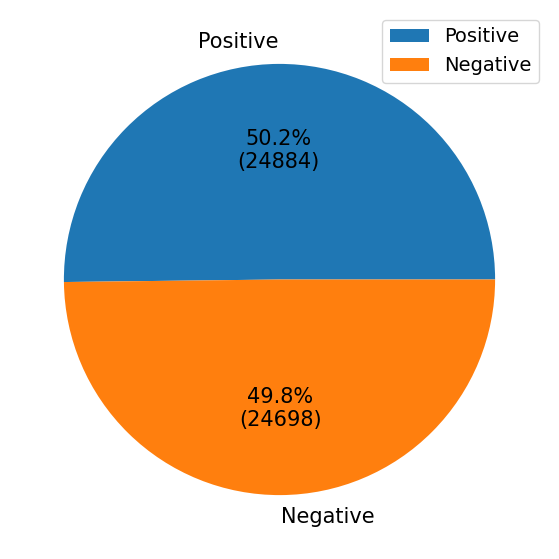

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Create autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['Positive', 'Negative']

fig, ax = plt.subplots(figsize =(11, 7))
plt.pie(data, labels = labels, autopct = lambda pct: func(pct, data),
        textprops={'fontsize': 15})

labels = [r'Positive', r'Negative']
plt.legend(labels, loc ="best", prop={'size': 14})
plt.show()


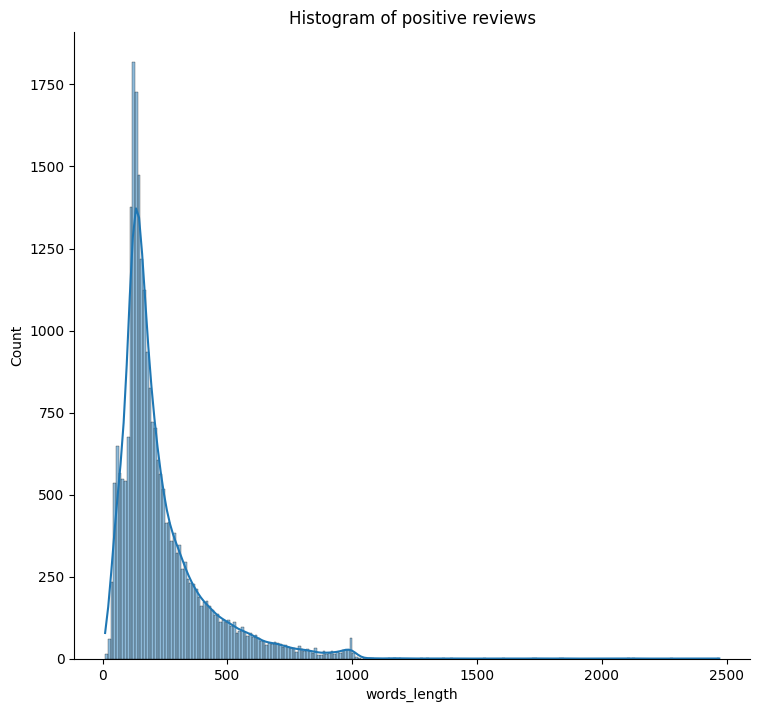

In [126]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words_length'] = words_len

hist_positive = sns.displot(
    df_temp[df_temp['sentiment'] == 'positive'],
    x='words_length', hue="sentiment", kde=True, height=7, aspect=1.1, legend=False).set(title='Histogram of positive reviews')
plt.show(hist_positive)


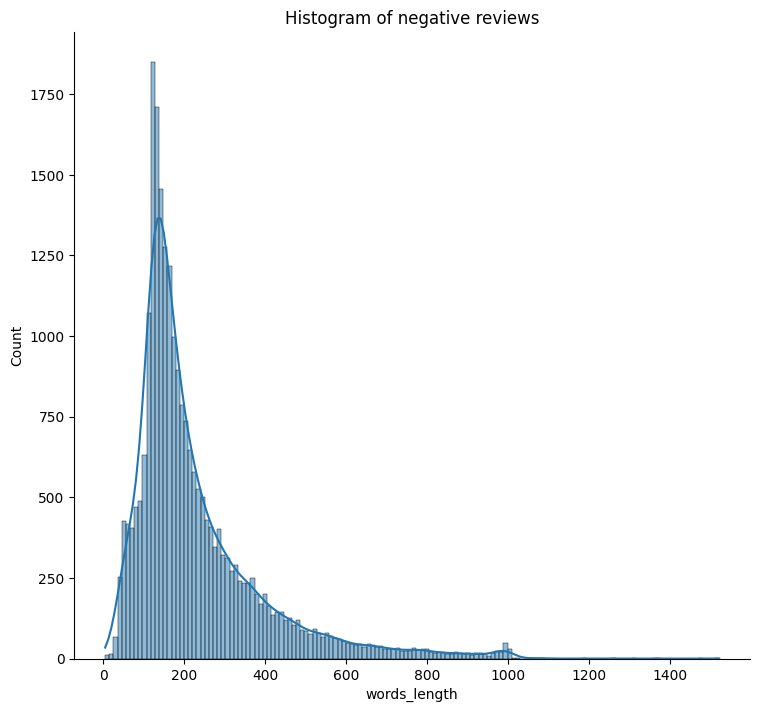

In [127]:
hist_negative = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'negative'],
    x='words_length', hue="sentiment", kde=True, height=7, aspect=1.1, legend=False).set(title='Histogram of negative reviews')
plt.show(hist_negative)

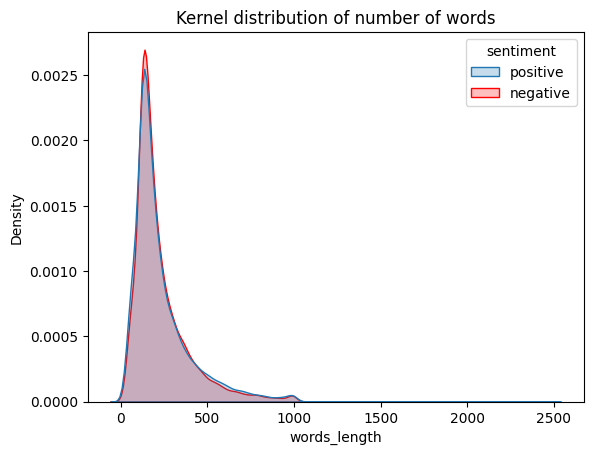

In [128]:
kernel_distribution_number_words_plot = sns.kdeplot(
    data = df_temp, x="words_length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']).set(title='Kernel distribution of number of words') # Changed 'word_length' to 'words_length'
plt.show(kernel_distribution_number_words_plot)

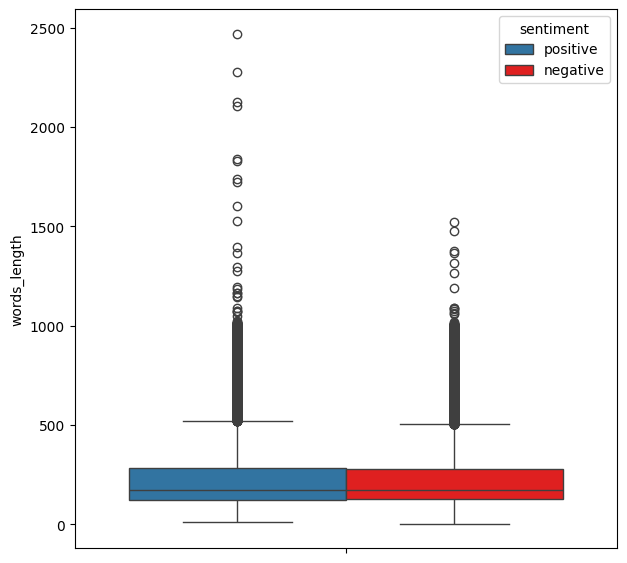

In [131]:
fig, ax = plt.subplots(figsize=(7, 7))
box_plot = sns.boxplot(

                       hue='sentiment', y='words_length', data=df_temp, palette=[sns.color_palette()[0], 'red'])
plt.show(box_plot)


In [139]:
df['review'] = df['review'].apply(preprocess_text)
df.head()

<ipython-input-118-35fee137cb0e>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


In [140]:
from collections import Counter
words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
  if word not in stop:
    vocabs.append(word)
    word_counts.append(count)


In [141]:
most[:10]

[('movie', 100605),
 ('film', 91130),
 ('one', 53525),
 ('like', 39746),
 ('would', 30811),
 ('time', 30091),
 ('good', 28905),
 ('character', 27801),
 ('story', 24600),
 ('even', 24440)]

In [142]:
word_count_df = pd.DataFrame({'word': vocabs, 'count': word_counts})
word_count_df

,word,count
0,movie,100605
1,film,91130
2,one,53525
3,like,39746
4,would,30811
...,...,...
143137,ohsohard,1
143138,effortful,1
143139,frenchonly,1
143140,clatter,1


Spliting the dataset

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

Vectorizing

In [145]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_tfidf = tfidf_vectorizer.transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [146]:
x_train_tfidf.shape

(39665, 10000)

Train model

In [102]:
pip install xgboost

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Decision Tree Classifier

In [148]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    #max_depth=10,
    random_state=42
)
dt_classifier.fit(x_train_tfidf, y_train)
y_predict = dt_classifier.predict(x_test_tfidf)
accuracy_score(y_predict, y_test)
#

0.7180598971463145

Random Forest Classifier

In [149]:
rf_classifier = RandomForestClassifier(
    # n_estimators=100,
    # criterion='entropy',
    # random_state=42
    )
rf_classifier.fit(x_train_tfidf, y_train)
y_predict = rf_classifier.predict(x_test_tfidf)
accuracy_score(y_predict, y_test)

0.8404759503882222

Adaboost Classifier

In [150]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train_tfidf, y_train)
y_predict = ada_classifier.predict(x_test_tfidf)
accuracy_score(y_predict, y_test)

0.7930825854593123

Gradient Boost

In [151]:
gradient_classifier = GradientBoostingClassifier()
gradient_classifier.fit(x_train_tfidf, y_train)
y_predict = gradient_classifier.predict(x_test_tfidf)
accuracy_score(y_predict, y_test)

0.7968135524856307

XGBoost

In [152]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train_tfidf, y_train)
y_predict = xgb_classifier.predict(x_test_tfidf)
accuracy_score(y_predict, y_test)

0.8490470908540889

Support Vector Machine

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(x_train_tfidf, y_train)
y_predict = svm_classifier.predict(x_test_tfidf)
accuracy_score(y_predict, y_test)